In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/stack-overflow-developer-survey-results-2019/so_survey_2019.pdf
/kaggle/input/stack-overflow-developer-survey-results-2019/survey_results_schema.csv
/kaggle/input/stack-overflow-developer-survey-results-2019/README_2019.txt
/kaggle/input/stack-overflow-developer-survey-results-2019/survey_results_public.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv("../input/stack-overflow-developer-survey-results-2019/survey_results_public.csv")

In [4]:
data.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [5]:
data.shape

(88883, 85)

In [6]:

data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [8]:
data.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.003357,0.002930,-0.004589,-0.005240,-0.001829
CompTotal,-0.003357,1.000000,0.039725,0.003074,0.061090,0.016500
ConvertedComp,0.002930,0.039725,1.000000,0.013908,-0.021261,0.108268
WorkWeekHrs,-0.004589,0.003074,0.013908,1.000000,0.021092,0.019976
CodeRevHrs,-0.005240,0.061090,-0.021261,0.021092,1.000000,-0.022486
Age,-0.001829,0.016500,0.108268,0.019976,-0.022486,1.000000


In [9]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [10]:
data_developer=data[data['MainBranch']=='I am a developer by profession']

In [11]:
data_developer.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [12]:
data_developer['Country'].value_counts()

United States     16100
India              6657
United Kingdom     4456
Germany            4244
Canada             2504
                  ...  
Malawi                1
Belize                1
Namibia               1
Tonga                 1
Djibouti              1
Name: Country, Length: 170, dtype: int64

In [13]:
data_developer_india=data_developer[data_developer['Country']=='India']

In [14]:
data_developer_india.shape

(6657, 85)

In [15]:
data_developer_india.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
49,50,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,23.0,Man,No,NaN,South Asian,No,Too long,Easy


In [16]:
data_developer_india.drop(['CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs','WorkPlan','WorkChallenge','WorkRemote','WorkLoc','ImpSyn','CodeRev','CodeRevHrs','UnitTests','PurchaseHow','PurchaseWhat',
                          'OrgSize','YearsCodePro','CareerSat','JobSat','MgrIdiot','MgrMoney','MgrWant','LastInt','FizzBuzz'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
data_developer_india.shape

(6657, 60)

In [34]:
final=data_developer_india[data_developer_india['Age']>21]

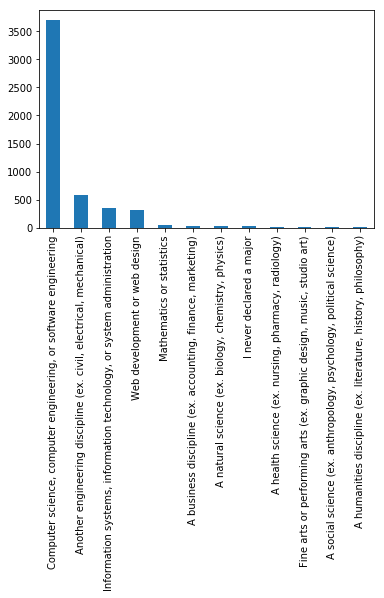

In [35]:
final['UndergradMajor'].value_counts().plot(kind='bar')

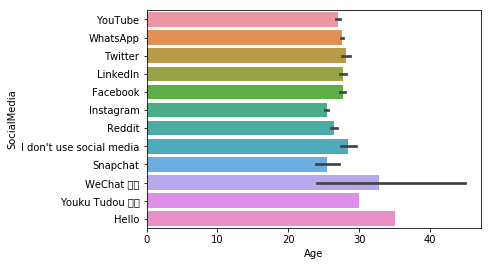

In [36]:
sns.barplot(x='Age',y='SocialMedia',data=final)

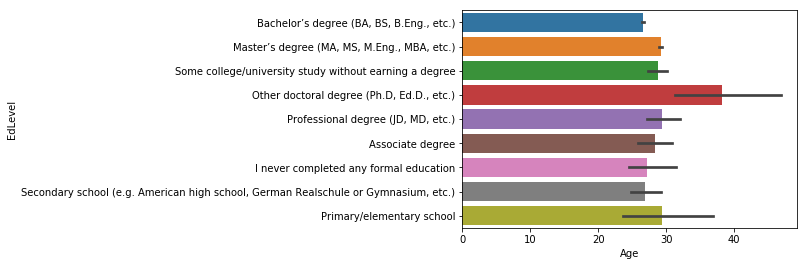

In [37]:
sns.barplot(x='Age',y='EdLevel',data=final)

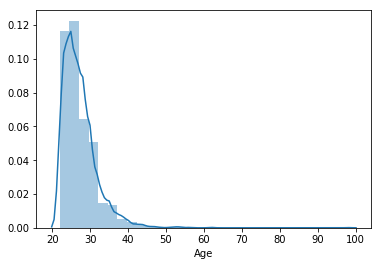

In [38]:
sns.distplot(final['Age'],bins=30)

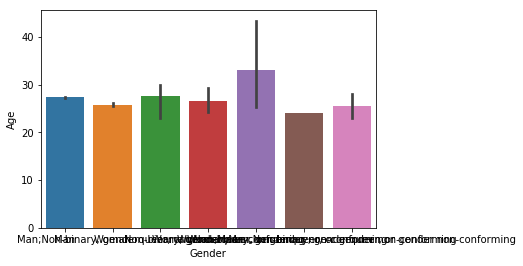

In [39]:
sns.barplot(x='Gender',y='Age',data=final)

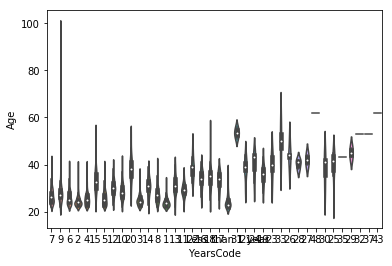

In [40]:
sns.violinplot(x='YearsCode',y='Age',data=final,split=True)

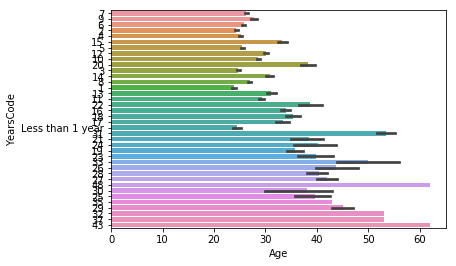

In [41]:
sns.barplot(x='Age',y='YearsCode',data=final)

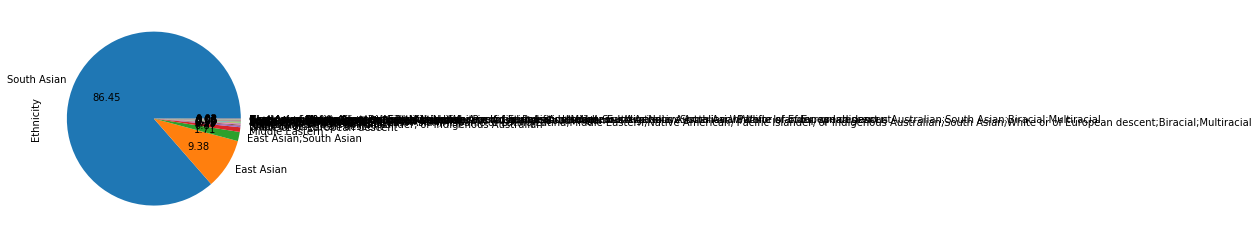

In [45]:
final['Ethnicity'].value_counts().plot(kind='pie',autopct='%0.2f')

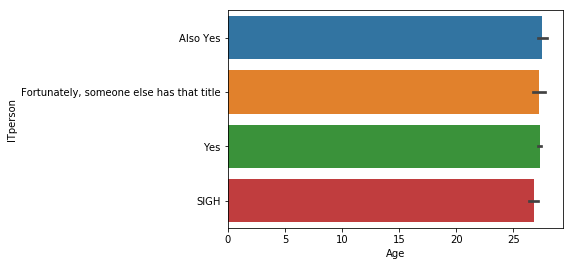

In [44]:
sns.barplot(x='Age',y='ITperson',data=final)